# K-means
The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest.

<ol>
<li> Initialize 𝑘 centroids randomly:  𝑘  distinct instances are chosen randomly from the dataset and the centroids are placed at their locations. </li>
<li> Repeat until convergence (i.e., until the centroids stop moving or you reach max number of iterations, etc.). </li>
<li> Assign each instance to the closest centroid. </li>
<li> Update the centroids to be the mean of the instances that are assigned to them. </li>
</ol>


In [4]:
# Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.cluster import KMeans

In [5]:
# Make blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

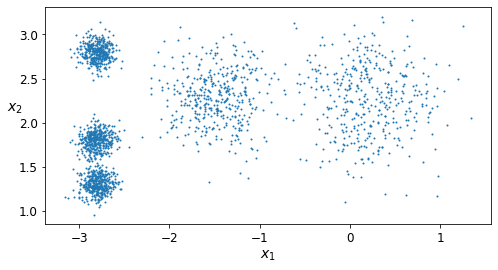

In [6]:
# Plot blobs
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [8]:
# Train a K-means clusterer on the blobs dataset
# Use 5 clusters 
k = 5

# Create a K-means instance with k clusters & random state of 42
kmeans = KMeans(n_clusters = k, random_state = 42  )


In [11]:
# Use the correct K-means fit method to calculate cluster centers AND predict the sample's cluster index
y_pred = kmeans.fit_predict(X)

# If you print y_pred you'll see that each sample was assigned to a cluster (1..5)
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [12]:
# Print the estimated centroids (cluster centers)
kmeans.cluster_centers_


array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

Scikit-Learn's KMeans maintains the *labels* of the instances it was trained on. This can be confusing at first because these are not labels like we use in supervised algorithms. In this context, the label of an instance is the index of the cluster that instance gets assigned to.

In [13]:
# Print the labels
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4])

In [14]:
# Predict labels for new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

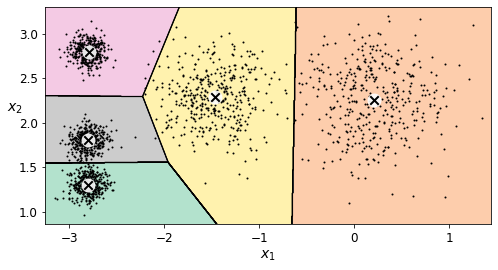

In [15]:
# Plot model decision boundaries
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Scikit-Learn's KMeans class uses an optimized algorithm by default. To get the original K-Means algorithm (as discussed in class), you have to set init = "random", n_init = 1, and algorithm = "full". 

In [22]:
# Use the original K-means algorithm (as described above) for 1, 2, and 3 iterations
# Use 5 clusters and random state of 0 (for all)

# Run 1 iteration of the original algorithm 
kmeans_iter1 = KMeans(n_clusters = 5, init = "random", n_init =1 ,algorithm = "full", max_iter = 1, random_state=0)

# Run 2 iterations
kmeans_iter2 = KMeans(n_clusters = 5, init ="random", n_init =1 ,
                     algorithm = "full", max_iter = 2, random_state=0)

# Run 3 iterations
kmeans_iter3 = KMeans(n_clusters = 5, init = "random", n_init =1 ,
                     algorithm = "full", max_iter = 3, random_state=0)

# Fit X with all models 
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

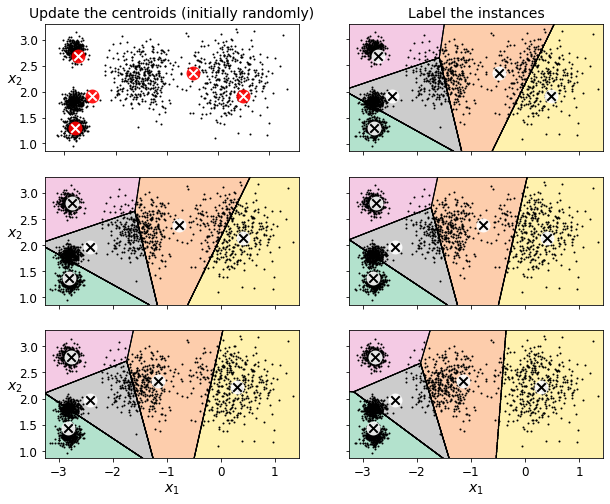

In [23]:
# Plot the 3 different iterations above
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)
plt.show()

## Variability & Inertia
In the original K-Means algorithm, the centroids are initialized randomly and the algorithm runs a single iteration to gradually improve the centroids. However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to different solutions. To select the best model, we need a way to evaluate the model's performance. Clustering is an unsupervised task, so we do not have the targets (or labels, or ground truth). But we can measure the *inertia*: the distance between each instance and its centroid. One approach to solve the variability issue is to run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia.

In [24]:
kmeans.inertia_


211.59853725816828

The score( ) method returns the *negative* inertia. In Scikit-Learn, a predictor's score( ) method must always respect the "greater is better" rule.

In [25]:
kmeans.score(X)

-211.5985372581683

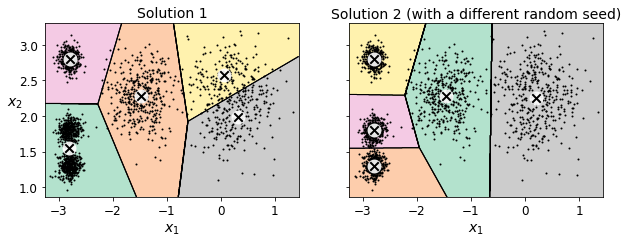

In [26]:
# Run K-Means with different random seeds
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)
        
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random seed)")
plt.show()

In [27]:
# Compare the models' inertias
# Higher inertia usually indicates a worse performing model
kmeans_rnd_init1.inertia_


219.43539442771402

In [28]:
kmeans_rnd_init2.inertia_

211.5985372581683

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times and selects the solution that minimizes the inertia. The default value is n_init = 10.

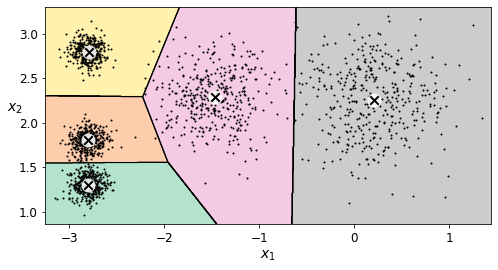

In [29]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()